In [15]:
import numpy as np

import pandas as pd

import statsmodels.api as sm

import matplotlib.pyplot as plt

%matplotlib inline

from pandas.core import datetools

df = pd. read_csv("C:\\Users\\pavan\\Downloads\\monthly_milk.csv")

df.head()

,month,milk_prod_per_cow_kg
0,1/1/1962,265.05
1,2/1/1962,252.45
2,3/1/1962,288.00
3,4/1/1962,295.20
4,5/1/1962,327.15


In [17]:
df.tail()

,month,milk_prod_per_cow_kg
163,8/1/1975,386.10
164,9/1/1975,367.65
165,10/1/1975,372.15
166,11/1/1975,358.65
167,12/1/1975,379.35


In [20]:
df['month'] = pd.to_datetime(df['month'])
df.head()

,month,milk_prod_per_cow_kg
0,1962-01-01,265.05
1,1962-02-01,252.45
2,1962-03-01,288.00
3,1962-04-01,295.20
4,1962-05-01,327.15


In [21]:
df.describe()

,milk_prod_per_cow_kg
count,168.000000
mean,339.618750
std,45.992036
min,248.850000
25%,304.987500
50%,342.450000
75%,371.025000
max,436.050000


In [22]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
milk_prod_per_cow_kg,168.0,339.61875,45.992036,248.85,304.9875,342.45,371.025,436.05


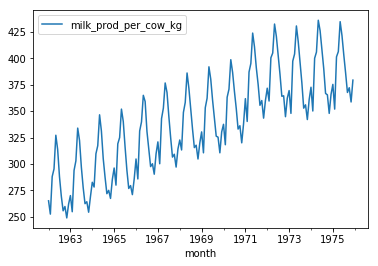

In [25]:
df.set_index('month',inplace=True)
df.plot()
# other df is an issue , observe

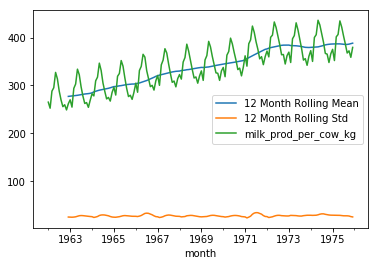

In [28]:
timeseries = df['milk_prod_per_cow_kg']
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')
timeseries.plot()

plt.legend()

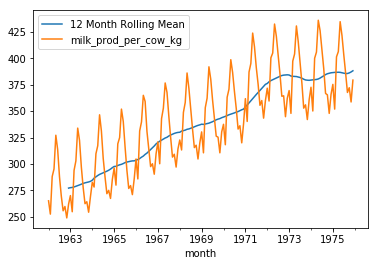

In [31]:
timeseries.rolling(12).mean().plot(label= '12 Month Rolling Mean')
timeseries.plot()

plt.legend()

<Figure size 432x288 with 0 Axes>

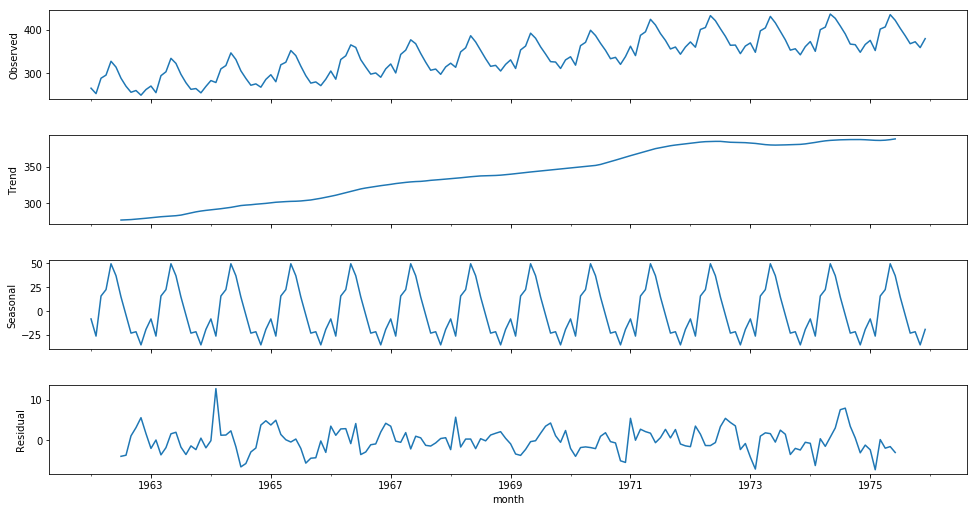

In [33]:
#Decomposition

#ETS decomposition allows us to see the individual parts!

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['milk_prod_per_cow_kg'], freq=12)
fig = plt.figure()

fig = decomposition.plot()

fig.set_size_inches(15, 8)

Testing for Stationarity
We can use the Augmented Dickey-Fuller unit root test.
In statistics and econometrics, an augmented Dickey—Fuller test (ADF) tests the null hypothesis that a unit root is present
in a time series sample. The alternative hypothesis is different depending on which version of the test is used, but is
usually stationarity or trend-stationarity.
Basically, we are trying to whether to accept the Null Hypothesis HO (that the time series has a unit root, indicating it is
non-stationary) or reject HO and go with the Alternative Hypothesis (that the time series has no unit root and is
stationary).
We end up deciding this based on the p-value return.

« A small p-value (typically < 0.05) indicates strong evidence against the null hypothesis, so you reject the null

hypothesis.

« Alarge p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.

Let's run the Augmented Dickey-Fuller test on our data:

In [40]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['milk_prod_per_cow_kg'])
print( "Augmented Dickey-Fuller Test:")
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
for value,label in zip(result,labels):
    print(label+' : '+str(value) )
      
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
      

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.3038115874221345
p-value : 0.6274267086030293
#Lags Used : 13
Number of Observations Used : 154
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [45]:
# Store in a function for later use!
def adf_check(time_series):
    #Pass in a time series, returns ADF report
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result, labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
          print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
          print("weak evidence against null hypothesis, time series has a wnit root. indicating it is non-stationary")
                               

important Note!

We have now realized that our data is seasonal (it is also pretty obvious from the plot itself). This means we
need to use Seasonal ARIMA on our model. If our data was not seasonal, it means we could use just ARIMA on
it. We will take this into account when differencing our data! 

Diiferencing

The first difference of a time series is the series of changes from one period to the next. We can do this easily with
pandas. You can continue to take the second difference, third difference, and so on until your data is stationary.

Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.0549955586530606
p-value : 0.03006800400178645
#Lags Used : 14
Number of Observations Used : 152
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


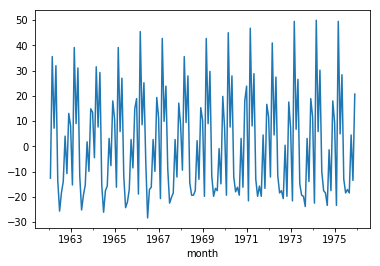

In [46]:
df['Milk First Difference'] = df['milk_prod_per_cow_kg'] - df['milk_prod_per_cow_kg'].shift(1)
# adf_check function
adf_check(df['Milk First Difference'].dropna())

##strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary
df['Milk First Difference'].plot()

Second Difference

# Sometimes it would be necessary to do a second difference

# This is just for show, we didn't need to do a second difference in our case

df['Milk Second Difference'] = df['Milk First Difference'] - df['Milk First Difference'].shift(1)

adf_check(df['Milk Second Difference'].dropna())

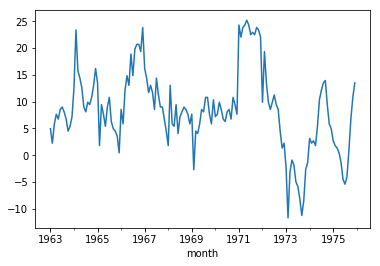

In [47]:
#seasonal Difference

df['Seasonal Difference'] = df['milk_prod_per_cow_kg'] - df['milk_prod_per_cow_kg'].shift(12)
df['Seasonal Difference'].plot()

In [48]:
# Seasonal Difference by itself was not enough!

adf_check(df[ 'Seasonal Difference' ].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.3354193143593998
p-value : 0.16079880527711288
#Lags Used : 12
Number of Observations Used : 143
weak evidence against null hypothesis, time series has a wnit root. indicating it is non-stationary


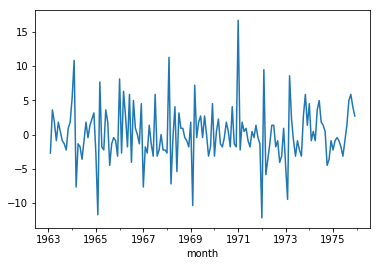

In [49]:
# You can also do seasonal first difference

df['Seasonal First Difference'] = df['Milk First Difference'] - df['Milk First Difference'].shift(12)
df['Seasonal First Difference'].plot()


Autocorrelation and Partial Autocorrelation Plots
An autocorrelation plot (also known as a Correlogram ) shows the correlation of the series with itself, lagged by x time units. 
So the y axis is the correlation and the x axis is the number of time units of lag.

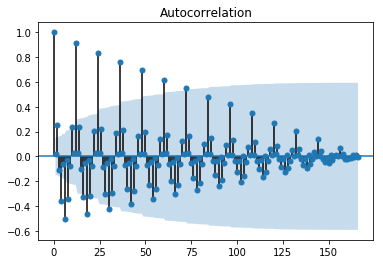

In [51]:
#interpreting ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# Duplicate plots

# Check out: https://stackoverflow.com/questions/21788593/statsmodels-duplicate-charts
# https://github.com/statsmodels/statsmodels/issues/1265

fig_first = plot_acf(df["Milk First Difference" ].dropna())

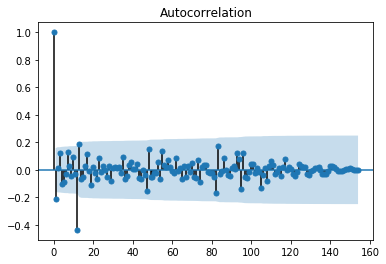

In [56]:
fig_seasonal_first = plot_acf(df['Seasonal First Difference'].dropna())

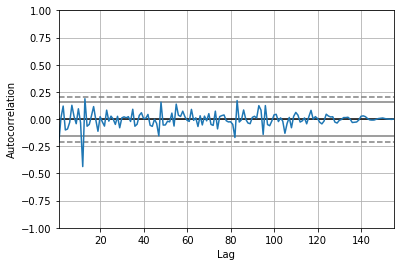

In [57]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Seasonal First Difference'].dropna())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


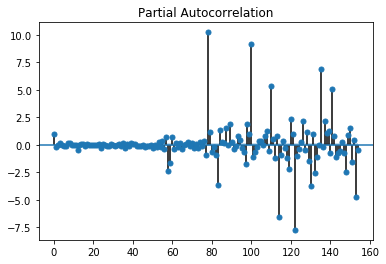

In [58]:
fig_seasonal_first2 = plot_pacf(df['Seasonal First Difference'].dropna())

Interpretation
Typically a sharp drop after lag "k" suggests an AR-k model should be used.
If there is a gradual decline, it suggests an MA model.

Final Thoughts on Autocorrelation and Partial Autocorrelation
Identification of an AR model is often best done with the PACF.
For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
Identification of an MA model is often best done with the ACF rather than the PACF.
For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

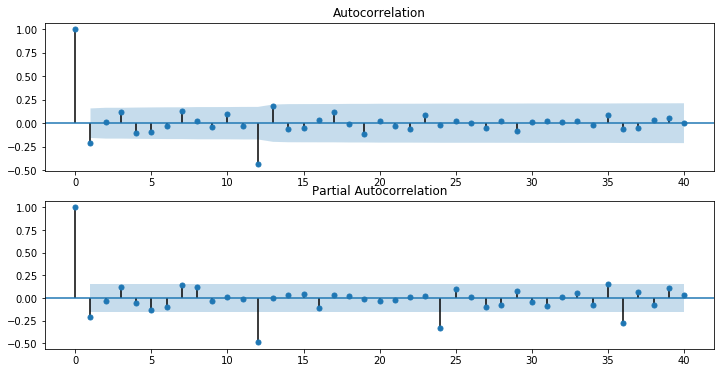

In [61]:
fig = plt.figure(figsize=(12,6))

axl = fig.add_subplot(211)

fig = sm.graphics.tsa.plot_acf(df[ 'Seasonal First Difference'].iloc[13:], lags=40, ax=axl)
ax2 = fig.add_subplot(212)

fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax2)

In [64]:
from statsmodels.tsa.arima_model import ARIMA
#help(ARIMA)

p,d,q parameters
p: The number of lag observations included in the model.
d: The number of times that the raw observations are differenced, also called the degree of differencing.
q: The size of the moving average window, also called the order of moving average.



In [65]:
# We have seasonal data:
model = sm.tsa.statespace.SARIMAX(df['milk_prod_per_cow_kg'],order=(0,1,0), seasonal_order=(1,1,1,12))
results = model. fit()
print(results.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:               milk_prod_per_cow_kg   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -410.300
Date:                            Fri, 08 Feb 2019   AIC                            826.599
Time:                                    08:24:27   BIC                            835.730
Sample:                                01-01-1962   HQIC                           830.308
                                     - 12-01-1975                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.5860      0.102   

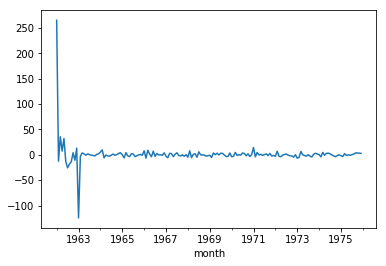

In [66]:
results.resid.plot()

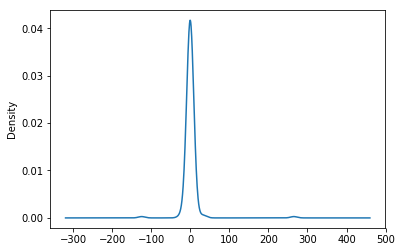

In [67]:
results.resid.plot(kind='kde')

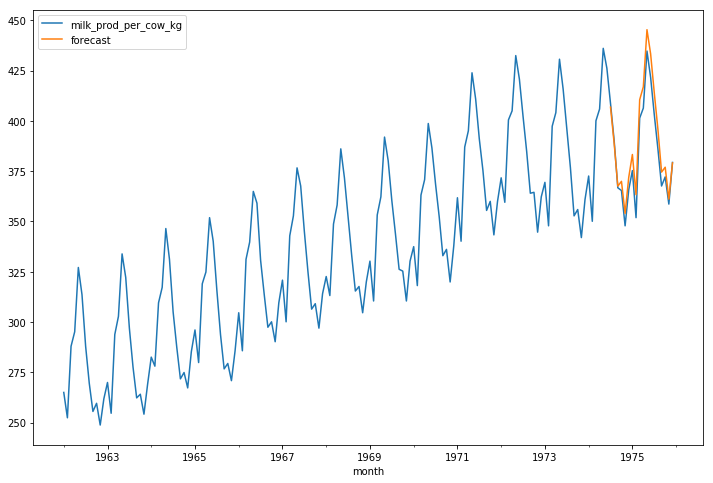

In [71]:
#Prediction of Future Values

#Firts we can get an idea of how well our model performs by just predicting for values that we actually already know
df['forecast'] = results.predict(start = 150, end= 168, dynamic= True)

df[['milk_prod_per_cow_kg','forecast']].plot(figsize=(12,8))

In [72]:
df.tail()

,milk_prod_per_cow_kg,Milk First Difference,Seasonal Difference,Seasonal First Difference,forecast
month,,,,,
1975-08-01,386.10,-17.10,-4.05,1.35,395.851192
1975-09-01,367.65,-18.45,0.90,4.95,374.547960
1975-10-01,372.15,4.50,6.75,5.85,376.975137
1975-11-01,358.65,-13.50,10.80,4.05,361.103900
1975-12-01,379.35,20.70,13.50,2.70,379.125127


In [74]:
# pd.date_range(df.index[-1].periods=12,freq='M')

from pandas.tseries.offsets import DateOffset

future_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,24) ]
future_dates

[Timestamp('1975-12-01 00:00:00'),
 Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00')]

In [79]:
future_dates_df = pd.DataFrame( index=future_dates[1:],columns=df.columns)
future_df = pd.concat([df,future_dates_df])
future_df.tail()

,milk_prod_per_cow_kg,Milk First Difference,Seasonal Difference,Seasonal First Difference,forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN
1977-08-01,NaN,NaN,NaN,NaN,NaN
1977-09-01,NaN,NaN,NaN,NaN,NaN
1977-10-01,NaN,NaN,NaN,NaN,NaN
1977-11-01,NaN,NaN,NaN,NaN,NaN


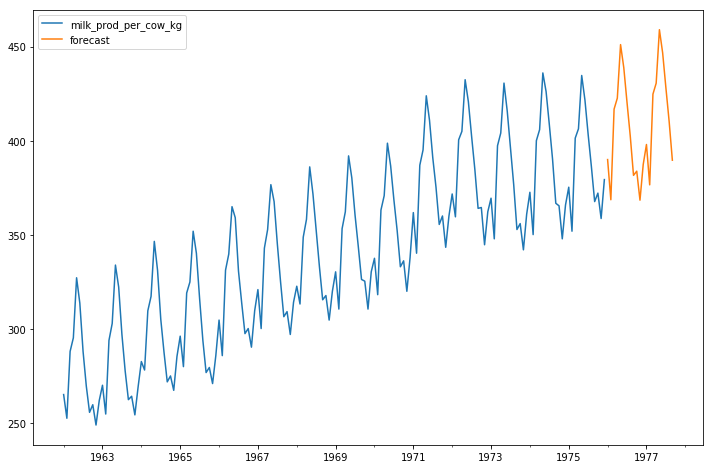

In [83]:
future_df['forecast'] = results.predict(start = 168, end = 188, dynamic= True)
future_df[['milk_prod_per_cow_kg', 'forecast']].plot(figsize=(12, 8))